# 21. Principal Component Analysis Example

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/21.PCA_Example.ipynb)

(Based on https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

In this notebook, we will learn about an unsupervised machine learning method for dimensionality reduction, principal component analysis (PCA).

### Introduction

- PCA is an **unsupervised linear dimensionality reduction technique** that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.

- It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

- Dimensions are nothing but features that represent the data. For example, the atomic descriptors we used already included the atomic number, atomic and ionic radii, electronegetivity, etc. Each of these descriptor components is a dimension. Note: Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.

- You can use PCA to cluster similar data points based on the feature correlation between them.

Definition: PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated numerical variables into a set of values of linearly uncorrelated variables called principal components.

### Five Steps of PCA

Principal component analysis can be broken down into five steps. We will go through each step, explaining what PCA does and discuss the underlying mathematical concepts such as standardization, covariance, eigenvectors and eigenvalues without focusing on how to compute them.

1. Standardize the range of continuous initial variables
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a feature vector to decide which principal components to keep
5. Recast the data along the principal components axes

Before we learn about and apply these five steps, we create a pandas dataframe containg the properties of the chemical elements.

In [1]:
# Install the mendeleev package using pip in the current Jupyter kernel
# To use them, you may need to restart the kernel
#import sys
#!{sys.executable} -m pip install mendeleev

from mendeleev.fetch import fetch_table
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

In [2]:
ptable = fetch_table('elements').select_dtypes([np.number])
ptable.head(10)

,atomic_number,atomic_radius,atomic_volume,boiling_point,density,dipole_polarizability,electron_affinity,evaporation_heat,fusion_heat,group_id,...,atomic_radius_rahm,metallic_radius,metallic_radius_c12,covalent_radius_pyykko_double,covalent_radius_pyykko_triple,discovery_year,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
0,1,25.0,14.1,20.280,0.000082,4.50711,0.754195,0.904,0.117,1.0,...,154.0,NaN,78.0,NaN,NaN,1766.0,105,0.00003,103.0,103.0
1,2,120.0,31.8,4.216,0.000164,1.38375,-19.700000,0.080,NaN,18.0,...,134.0,NaN,122.0,NaN,NaN,1895.0,112,0.00002,1.0,1.0
2,3,145.0,13.1,1118.150,0.534000,164.11250,0.618049,148.000,2.890,1.0,...,220.0,123.0,155.0,124.0,NaN,1817.0,1,0.00050,12.0,12.0
3,4,105.0,5.0,3243.000,1.850000,37.74000,-2.400000,309.000,12.210,2.0,...,219.0,89.0,112.0,90.0,85.0,1798.0,75,0.03000,77.0,77.0
4,5,85.0,4.6,3931.000,2.340000,20.50000,0.279723,504.500,23.600,13.0,...,205.0,80.0,98.0,78.0,73.0,1808.0,81,0.10000,86.0,86.0
5,6,70.0,5.3,5100.000,2.200000,11.30000,1.262119,NaN,NaN,14.0,...,190.0,NaN,86.0,67.0,60.0,NaN,87,0.20000,95.0,87.0
6,7,65.0,17.3,77.400,0.001145,7.40000,-1.400000,NaN,NaN,15.0,...,179.0,NaN,53.0,60.0,54.0,1772.0,93,0.20000,100.0,88.0
7,8,60.0,14.0,90.190,0.001308,5.30000,1.461113,NaN,NaN,16.0,...,171.0,NaN,NaN,57.0,53.0,1774.0,99,0.20000,101.0,97.0
8,9,50.0,17.1,85.010,0.001553,3.74000,3.401190,6.540,0.510,17.0,...,163.0,NaN,NaN,59.0,53.0,1886.0,106,0.08000,102.0,102.0
9,10,160.0,16.8,27.100,0.000825,2.66110,NaN,1.740,NaN,18.0,...,156.0,NaN,NaN,96.0,NaN,1898.0,113,0.00003,2.0,2.0


In [3]:
# Select all elements from hydrogen to lawrencium, the last of the actinides
ptable = ptable.iloc[list(range(1,103)), :]

# Drop the columns that include incomplete data
ptable = ptable.dropna(axis=1)

ptable.describe()

,atomic_number,density,dipole_polarizability,period,series_id,vdw_radius,covalent_radius_pyykko,vdw_radius_uff,en_ghosh,atomic_weight,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,52.500000,7.848443,103.034709,5.039216,6.745098,217.852941,142.647059,354.537255,0.185553,128.102017,56.343137,8.238015,51.500000,51.500000
std,29.588849,5.793088,82.736813,1.534563,2.734764,33.949408,34.009797,57.382610,0.061068,77.815171,34.674296,9.046910,29.588849,29.588849
min,2.000000,0.000164,1.383750,1.000000,1.000000,140.000000,46.000000,236.200000,0.087310,4.002602,1.000000,0.000020,1.000000,1.000000
25%,27.250000,2.772500,40.500000,4.000000,5.000000,200.250000,122.000000,314.500000,0.141291,58.753349,26.250000,1.000000,26.250000,26.250000
50%,52.500000,7.273500,73.000000,5.000000,8.000000,216.000000,142.000000,340.400000,0.178277,127.252235,54.000000,4.000000,51.500000,51.500000
75%,77.750000,10.450000,153.250000,6.000000,9.000000,238.750000,168.000000,401.300000,0.223322,194.367250,86.500000,14.500000,76.750000,76.750000
max,103.000000,22.587200,400.900000,7.000000,10.000000,348.000000,232.000000,490.000000,0.442712,262.000000,117.000000,54.000000,102.000000,102.000000


### Step 1. Standardization

The goal is to standardize the range of the variables so that each one of them contributes equally to the analysis.

PCA, is sensitive to the variances of the initial variables. If there are large differences between the ranges of the different features, those with larger ranges will dominate over those with small ranges.

For example, a the atomic number ranges from 1 to 118, while the atomic radius ranges from 0.25 Å for hydrogen to 2.65 Å for cesium. Hence the atomic number would dominate over the atomic radius, which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.
$$
x_\mathrm{standardized} = \frac{x - \mathrm{mean}}{\mathrm{standard\,\,deviation}}
$$

In [4]:
# Standardize each column
ptable_std = (ptable-ptable.mean())/ptable.std()

# Show the normalized data
ptable_std.describe()

,atomic_number,density,dipole_polarizability,period,series_id,vdw_radius,covalent_radius_pyykko,vdw_radius_uff,en_ghosh,atomic_weight,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,-5.224579e-17,-9.796086e-17,6.530724e-17,9.143013e-17,5.442270e-19,3.156516e-16,-2.775558e-16,-3.994626e-16,-2.068062e-16,-3.700743e-16,-2.176908e-18,4.136125e-17,1.850372e-17,3.210939e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.706724e+00,-1.354766e+00,-1.228606e+00,-2.632161e+00,-2.100765e+00,-2.293205e+00,-2.841742e+00,-2.062249e+00,-1.608762e+00,-1.594797e+00,-1.596085e+00,-9.105866e-01,-1.706724e+00,-1.706724e+00
25%,-8.533620e-01,-8.762068e-01,-7.558269e-01,-6.772064e-01,-6.381164e-01,-5.185051e-01,-6.070915e-01,-6.977245e-01,-7.248106e-01,-8.911973e-01,-8.678803e-01,-8.000539e-01,-8.533620e-01,-8.533620e-01
50%,0.000000e+00,-9.924639e-02,-3.630151e-01,-2.555496e-02,4.588702e-01,-5.457948e-02,-1.902566e-02,-2.463683e-01,-1.191463e-01,-1.092052e-02,-6.757563e-02,-4.684489e-01,0.000000e+00,0.000000e+00
75%,8.533620e-01,4.490795e-01,6.069280e-01,6.260965e-01,8.245324e-01,6.155353e-01,7.454599e-01,8.149289e-01,6.184702e-01,8.515721e-01,8.697181e-01,6.921684e-01,8.533620e-01,8.533620e-01
max,1.706724e+00,2.544197e+00,3.600154e+00,1.277748e+00,1.190195e+00,3.833559e+00,2.627271e+00,2.360693e+00,4.211034e+00,1.720718e+00,1.749332e+00,5.058300e+00,1.706724e+00,1.706724e+00


In [5]:
# Alternatively, we can use the sklearn zscore function
from scipy.stats import zscore

# Note that there is a small difference because the
# zscore standard deviation is normalized by N and not N-1
# We can use the same normalization above,
# if we replace std() with std(ddof=0)
ptable.apply(zscore).describe()

,atomic_number,density,dipole_polarizability,period,series_id,vdw_radius,covalent_radius_pyykko,vdw_radius_uff,en_ghosh,atomic_weight,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,1.020000e+02
mean,1.741526e-17,-1.066685e-16,1.741526e-17,1.523836e-16,-3.591898e-17,3.178286e-16,-2.481675e-16,-4.353816e-16,-1.937448e-16,-3.504822e-16,-1.088454e-18,6.095342e-17,0.000000,1.904794e-18
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938,1.004938e+00
min,-1.715152e+00,-1.361456e+00,-1.234673e+00,-2.645159e+00,-2.111139e+00,-2.304529e+00,-2.855775e+00,-2.072433e+00,-1.616706e+00,-1.602673e+00,-1.603967e+00,-9.150834e-01,-1.715152,-1.715152e+00
25%,-8.575762e-01,-8.805338e-01,-7.595594e-01,-6.805507e-01,-6.412676e-01,-5.210656e-01,-6.100895e-01,-7.011701e-01,-7.283899e-01,-8.955983e-01,-8.721661e-01,-8.040048e-01,-0.857576,-8.575762e-01
50%,0.000000e+00,-9.973650e-02,-3.648077e-01,-2.568116e-02,4.611363e-01,-5.484901e-02,-1.911961e-02,-2.475849e-01,-1.197347e-01,-1.097445e-02,-6.790933e-02,-4.707623e-01,0.000000,0.000000e+00
75%,8.575762e-01,4.512972e-01,6.099252e-01,6.291884e-01,8.286042e-01,6.185750e-01,7.491412e-01,8.189532e-01,6.215244e-01,8.557775e-01,8.740130e-01,6.955865e-01,0.857576,8.575762e-01
max,1.715152e+00,2.556761e+00,3.617933e+00,1.284058e+00,1.196072e+00,3.852490e+00,2.640245e+00,2.372351e+00,4.231829e+00,1.729216e+00,1.757971e+00,5.083280e+00,1.715152,1.715152e+00


### Step 2. Calculation of the Covariance Matrix

The covariance matrix determines if pairs of the input variables are correlated. The covariance matrix is a $p \times p$ symmetric matrix (where $p$ is the number of dimensions). The entries are the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables $x$, $y$, and $z$, the covariance matrix is a 3×3 matrix of this from:
$$
\begin{bmatrix}
   \mathrm{Cov}(x,x) & \mathrm{Cov}(x,y) & \mathrm{Cov}(x,z) \\
   \mathrm{Cov}(y,x) & \mathrm{Cov}(y,y) & \mathrm{Cov}(y,z) \\
   \mathrm{Cov}(z,x) & \mathrm{Cov}(z,y) & \mathrm{Cov}(z,z) \\
\end{bmatrix}
$$

In [6]:
# We use the pandas covariance function
print("Calculating Covariance:")
Covariance = ptable_std.cov()
print(Covariance)

Calculating Covariance:
                           atomic_number   density  dipole_polarizability  \
atomic_number                   1.000000  0.685792               0.352281   
density                         0.685792  1.000000               0.021482   
dipole_polarizability           0.352281  0.021482               1.000000   
period                          0.956171  0.659507               0.506725   
series_id                       0.601142  0.693989               0.209404   
vdw_radius                      0.580882  0.219358               0.853373   
covalent_radius_pyykko          0.621484  0.209977               0.857353   
vdw_radius_uff                  0.056423 -0.359194               0.004758   
en_ghosh                       -0.035084 -0.020828              -0.449819   
atomic_weight                   0.998998  0.679259               0.349269   
mendeleev_number               -0.329844 -0.215881              -0.849865   
dipole_polarizability_unc       0.572964  0.434330  

Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal:
$$
\begin{bmatrix}
   \mathrm{Var}(x,x) & \mathrm{Cov}(x,y) & \mathrm{Cov}(x,z) \\
   \mathrm{Cov}(x,y) & \mathrm{Var}(y,y) & \mathrm{Cov}(y,z) \\
   \mathrm{Cov}(x,z) & \mathrm{Cov}(y,z) & \mathrm{Var}(z,z) \\
\end{bmatrix}
$$

The sign of the covariance entries determine the correlation:

- If positive: The two variables increase or decrease together (correlated)
- If negative: One increases when the other decreases (inversely correlated)
- If zero: The two variables are uncorrelated

<AxesSubplot:>

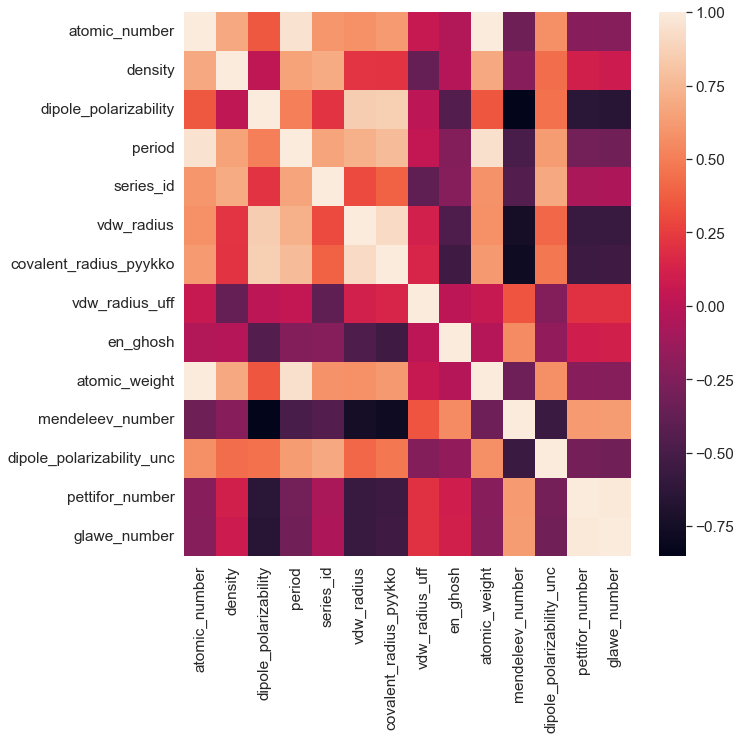

In [7]:
# Heatmap of the covariance matrix
import seaborn as sns

# plot the heatmap
sns.set(rc = {'figure.figsize':(10,10)})
sns.set(font_scale=1.4)
sns.heatmap(Covariance, 
        xticklabels=Covariance.columns,
        yticklabels=Covariance.columns)

In [8]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

Covariance.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})\
    .set_caption("Hover to magify")\
    .format(precision=2)\
    .set_table_styles(magnify())

,atomic_number,density,dipole_polarizability,period,series_id,vdw_radius,covalent_radius_pyykko,vdw_radius_uff,en_ghosh,atomic_weight,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
atomic_number,1.00,0.69,0.35,0.96,0.60,0.58,0.62,0.06,-0.04,1.00,-0.33,0.57,-0.22,-0.22
density,0.69,1.00,0.02,0.66,0.69,0.22,0.21,-0.36,-0.02,0.68,-0.22,0.43,0.11,0.08
dipole_polarizability,0.35,0.02,1.00,0.51,0.21,0.85,0.86,0.00,-0.45,0.35,-0.85,0.45,-0.64,-0.65
period,0.96,0.66,0.51,1.00,0.67,0.72,0.77,0.04,-0.23,0.95,-0.50,0.63,-0.30,-0.31
series_id,0.60,0.69,0.21,0.67,1.00,0.30,0.39,-0.39,-0.22,0.59,-0.45,0.68,-0.07,-0.06
vdw_radius,0.58,0.22,0.85,0.72,0.30,1.00,0.92,0.11,-0.47,0.57,-0.74,0.41,-0.57,-0.57
covalent_radius_pyykko,0.62,0.21,0.86,0.77,0.39,0.92,1.00,0.15,-0.54,0.61,-0.78,0.48,-0.55,-0.55
vdw_radius_uff,0.06,-0.36,0.00,0.04,-0.39,0.11,0.15,1.00,0.01,0.06,0.34,-0.23,0.20,0.20
en_ghosh,-0.04,-0.02,-0.45,-0.23,-0.22,-0.47,-0.54,0.01,1.00,-0.02,0.55,-0.17,0.10,0.11
atomic_weight,1.00,0.68,0.35,0.95,0.59,0.57,0.61,0.06,-0.02,1.00,-0.33,0.57,-0.22,-0.23


### Step 3. Compute the Eigenvectors and Eigenvalues of the Covariance Matrix

Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.

What do we mean by principal components?

- Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables.
- These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.
- So, the idea is 10-dimensional data gives you 10 principal components, but the PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.

In [9]:
eigenvalues,eigenvectors = np.linalg.eig(Covariance)
print(eigenvalues)

[6.87779953e+00 2.80248233e+00 1.60302672e+00 1.28261383e+00
 5.44115725e-01 3.17811601e-01 2.08045563e-01 1.46151566e-01
 9.43594379e-02 5.82679644e-02 4.03521440e-02 1.75584313e-04
 1.31614970e-02 1.16365166e-02]


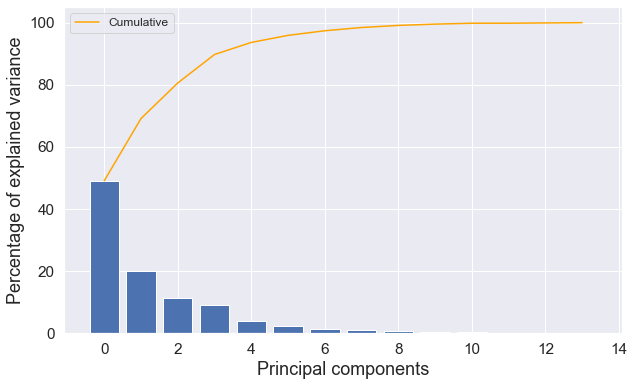

In [10]:
#Explained variance
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(eigenvalues)),100*eigenvalues/np.sum(eigenvalues))
plt.plot(np.cumsum(100*eigenvalues/np.sum(eigenvalues)), color='orange', label='Cumulative')
plt.xlabel('Principal components', fontsize=18)
plt.ylabel('Percentage of explained variance', fontsize=18)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.legend(fontsize=12)
plt.show()

### How PCA Constructs the Principal Components

There are as many principal components as there are variables in the data. Principal components are constructed in such a manner that the first principal component accounts for the **largest possible variance** in the data set.

### Step 5. Create a Feature Vector

We need to decide which principal components to keep.

Computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call **feature vector**.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

In [11]:
feature_vectors = (eigenvectors.T[:][:2])
print(feature_vectors)

[[-0.30057879 -0.1894875  -0.29859256 -0.34047344 -0.24056158 -0.32984772
  -0.34293213  0.04847604  0.15212746 -0.2984636   0.308599   -0.26951952
   0.22435891  0.2271808 ]
 [ 0.29808067  0.43474929 -0.29804847  0.21816712  0.31064207 -0.16577115
  -0.14417723 -0.05098993  0.17500508  0.29601094  0.22080205  0.13587802
   0.35838434  0.35276139]]


### Step 5. Recast the data along the principal component axes

In the previous steps, apart from standardization, we did not make any changes to the data. We just selected the principal components and formed the feature vector. The input data set remained always in terms of the original axes (i.e, in terms of the initial variables).

In this last step, we use the feature vector formed from the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.
$$
\text{PCA_Dataset = Standardized Original Dataset} \times \text{Feature_vectors}^\mathrm{T}
$$

In [12]:
ptable_pca = ptable_std.dot(feature_vectors.T)
print(ptable_pca[:5])

          0         1
1  5.167825 -1.667939
2  1.292934 -3.928870
3  3.968095 -0.848209
4  4.102852 -0.486177
5  4.998421 -0.457871


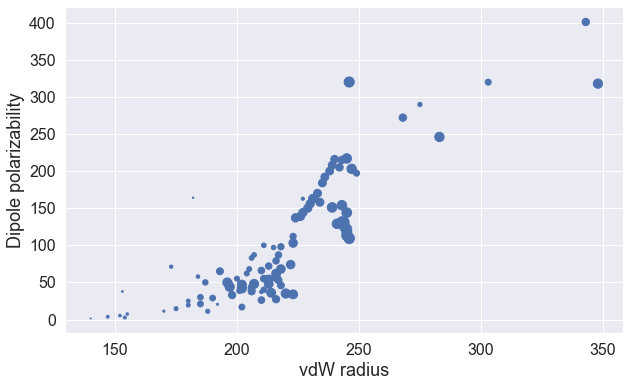

In [13]:
# plot data
plt.figure(figsize=(10, 6))
X = ptable.vdw_radius
Y = ptable.dipole_polarizability
plt.scatter(X, Y, s=ptable.index)
plt.xlabel('vdW radius', fontsize=18)
plt.ylabel('Dipole polarizability', fontsize=18)
plt.show()

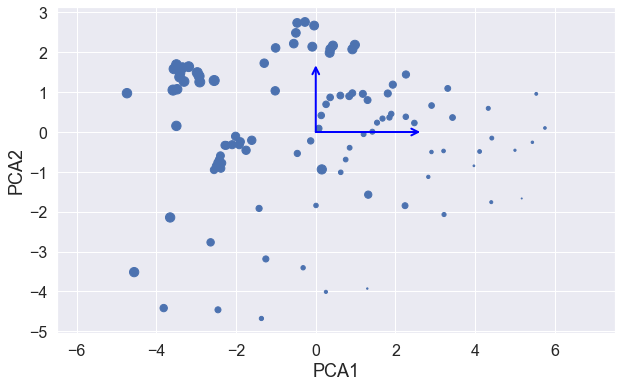

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='blue')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(10, 6))
X = ptable_pca.loc[:, 0]
Y = ptable_pca.loc[:, 1]
plt.scatter(X, Y, s=ptable_pca.index)
for length, vector in zip(eigenvalues, np.identity(2)):
    v = vector  * np.sqrt(length)
    draw_vector([0,0], v)

plt.xlabel('PCA1', fontsize=18)
plt.ylabel('PCA2', fontsize=18)
plt.axis('equal')
plt.show()